# 機械学習の手法

* 教師あり学習: 正解データは **アノテーション(annotation)** と呼ぶ
* 教師なし学習: **次元削減(dimensionality reduction)** と **クラスタリング(clustering)** がよく知られる
* 自己学習: 教師あり学習の一種。アノテーションラベルが必要とされず、大抵は発見的アルゴリズムを用いて入力データから生成される。 **オートエンコーダ(autoencoder)** がよく知られる。
* 強化学習: **エージェント(agent)** が環境に関する情報を取得し、何らかの報酬が最大になるような行動の選び方を学習する手法

# 機械学習の一般的フロー

## 1. 問題を定義  
出力は入力から予測できるものという仮設が成り立つ必要がある。利用可能なデータに入力と出力の関係を学習できるだけの情報利得が必要。これが成り立たない問題の一つに **非定常問題(nonstationary problem)** がある。刻一刻とパターンが変化し、予測したい期間が訓練期間と異なる場合が該当する。その場合にはパターンが一周する期間で学習させるなどが必要になる。

* 直面している問題の種類が何か
    * 教師あり学習 (二値分類、多クラス分類、スカラー回帰...)
    * 教師なし学習 (クラスタリング、次元削減...)
    * 強化学習...
* 問題を解ける入力データ、教師データを入手できるか

## 2. 成功の指標を定義
モデルの性能を評価する指標を決める

* 均衡分類問題: 正解率と **受信者操作特性曲線(ROC曲線)** の **曲線下面積(AUC)** が主な指標
* 不均衡分類問題: **適合率(precision)** と **再現率(recall)** を使用できる。ランキング問題や多ラベル問題には MAP (Mean AveragePrecision) を使用可能。Kaggleコンペを見ると様々な指標が見れる。

## 3. 評価プロトコルを決定
データは訓練データ、検証データ、テストデータの3つに分割する。要注意する点として、訓練した結果の評価には検証データを使用すべきでテストデータを使うべきではない。モデルのチューニングにテストデータを使う行為も学習の一種と言え、 **過学習** に陥ることがある (**情報の漏れ(information leak)**)。評価方法にはデータを効率よく使った上でこれを避けるものもある。

* ホールドアウト法: 単純分割
* k分割交差検証: データをK個に分割し、K-1個で訓練し1個で評価する。これをK回行い平均を取る方法。データが少ない場合に使用される
* 反復的なk分割交差検証: k分割交差検証を更に信頼性を高くする方法

データの選択に注意する点として以下もある。

* データの典型性: 訓練と検証でデータに偏りがあっては良くない。一般にシャッフルする
* 時間の矢: 時系列データの場合にはシャッフルさせない。当該時間を未来のデータで予測する事がないようにする
* データの冗長性: 訓練と検証でデータが重複するのは最悪の展開。重複は除去する必要がある

## 4. データを準備

* ベクトル化
* 値の正規化: 一般に0～1の範囲にするべき。変数毎の値の範囲を揃えるべき
* 特徴エンジニアリング: モデルが扱いやすいデータにしたほうが良い。特に使用可能なデータが少ない場合に有効

## 5. ベースラインを超える性能のモデルを開発
**統計的検出力 (statistical power)** を実現できるモデルを作る。  
一般には以下の選択になる。この他に最適化手法を選ぶ必要があるが、ほとんどの場合は RMSProp で十分とされる。

| 問題の種類             | 最後の層の活性化関数 | 損失関数                   |
| ---------------------- | -------------------- | -------------------------- |
| 二値分類               | sigmoid              | binary_crossentropy        |
| 多クラス単一ラベル分類 | softmax              | categorical_crossentropy   |
| 他クラスタラベル分類   | sigmoid              | binary_crossentropy        |
| 任意の値に対する回帰   | (なし)               | mse                        |
| 0～1の値に対する回帰   | sigmoid              | mse or binary_crossentropy |

## 6. 過学習するモデルの開発
モデルの最適化を行う。最適なモデルは適合不足と過学習の真ん中に存在するため、まずは過学習させてみる。

* 層の追加
* 層のユニット数の追加
* 訓練のエポック数を増やす

## 7. モデル正則化とハイパーパラメータの調整
モデルの修正 → 訓練 → 評価 → 修正を繰り返し行い、モデルが性能を出し切るように調整する。ここが最も時間がかかる。検証データによる評価を繰り返すと検証データへ過学習していく。最後のテストデータでのモデル評価で検証データとのスコア差が大きい場合、検証プロセスの信頼性が無いまたは過学習が生じてる。評価プロトコルをk分割交差検証に変えるなど、より信頼性の高い方法に変える必要がある。

* ドロップアウトを追加
* 別のモデルを試す (層の追加や削除、ユニット追加)
* L1/L2 正則化を追加
* ハイパーパラメータを調整 (学習率を変更するなど)
* 特徴エンジニアリング (特徴量の追加や、情報利得がない特徴量を削除)


# パラメータの調整 (過学習と適合不足)
訓練データを増やしたり、ネットワークサイズを調整、正則化が有効

## 正則化

* L1正則化: 重み係数の絶対値に対してペナルティを掛ける
* L2正則化: 重み係数の2乗に対してペナルティを掛ける。 **荷重減衰(weight decay)** とも呼ばれる。

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow.keras as keras
import sklearn.preprocessing as prep

%matplotlib inline

In [9]:
from tensorflow.keras import datasets, models, layers, optimizers, activations, losses, utils
from sklearn.feature_extraction import DictVectorizer
import collections

In [98]:
(train_data_raw, train_label_raw), (test_data_raw, test_label_raw) = datasets.boston_housing.load_data()

In [99]:
ss = prep.StandardScaler()
train_data = ss.fit_transform(train_data_raw)
test_data = ss.transform(test_data_raw)

train_label = train_label_raw
test_label = test_label_raw

L1正則化 (値が大きいほど強い正則化で重みが小さくなる)

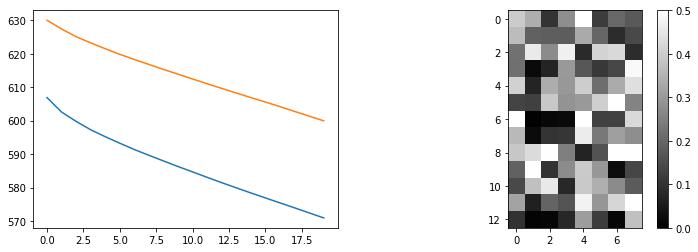

In [154]:
mod = models.Sequential()
mod.add(layers.Dense(8, "relu", input_shape=(train_data.shape[1],), kernel_regularizer=regularizers.l1(0.001)))
mod.add(layers.Dense(8, "relu"))
mod.add(layers.Dense(1))
mod.compile("RMSProp", loss="mse")
res = mod.fit(train_data, train_label, batch_size=128, epochs=20, verbose=0, validation_data=(test_data, test_label))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(res.history["loss"])
plt.plot(res.history["val_loss"])

plt.subplot(1, 2, 2)
plt.imshow(np.abs(mod.layers[0].get_weights()[0]), cmap="gray", vmin=0, vmax=0.5)
plt.colorbar()

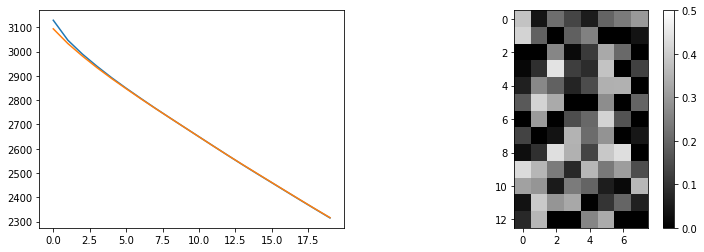

In [155]:
mod = models.Sequential()
mod.add(layers.Dense(8, "relu", input_shape=(train_data.shape[1],), kernel_regularizer=regularizers.l1(100)))
mod.add(layers.Dense(8, "relu"))
mod.add(layers.Dense(1))
mod.compile("RMSProp", loss="mse")
res = mod.fit(train_data, train_label, batch_size=128, epochs=20, verbose=0, validation_data=(test_data, test_label))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(res.history["loss"])
plt.plot(res.history["val_loss"])

plt.subplot(1, 2, 2)
plt.imshow(np.abs(mod.layers[0].get_weights()[0]), cmap="gray", vmin=0, vmax=0.5)
plt.colorbar()

L2正則化

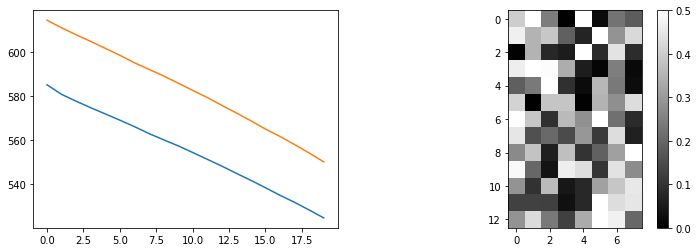

In [156]:
mod = models.Sequential()
mod.add(layers.Dense(8, "relu", input_shape=(train_data.shape[1],), kernel_regularizer=regularizers.l2(0.001)))
mod.add(layers.Dense(8, "relu"))
mod.add(layers.Dense(1))
mod.compile("RMSProp", loss="mse")
res = mod.fit(train_data, train_label, batch_size=128, epochs=20, verbose=0, validation_data=(test_data, test_label))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(res.history["loss"])
plt.plot(res.history["val_loss"])

plt.subplot(1, 2, 2)
plt.imshow(np.abs(mod.layers[0].get_weights()[0]), cmap="gray", vmin=0, vmax=0.5)
plt.colorbar()

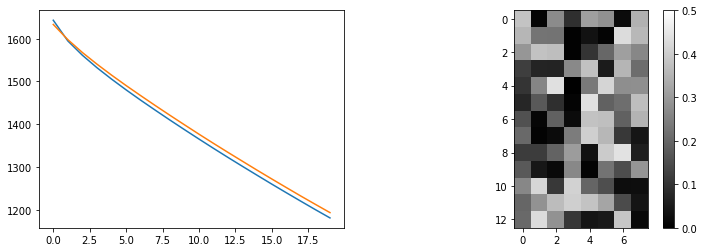

In [157]:
mod = models.Sequential()
mod.add(layers.Dense(8, "relu", input_shape=(train_data.shape[1],), kernel_regularizer=regularizers.l2(100)))
mod.add(layers.Dense(8, "relu"))
mod.add(layers.Dense(1))
mod.compile("RMSProp", loss="mse")
res = mod.fit(train_data, train_label, batch_size=128, epochs=20, verbose=0, validation_data=(test_data, test_label))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(res.history["loss"])
plt.plot(res.history["val_loss"])

plt.subplot(1, 2, 2)
plt.imshow(np.abs(mod.layers[0].get_weights()[0]), cmap="gray", vmin=0, vmax=0.5)
plt.colorbar()

## ドロップアウト
訓練中にその層の出力特徴量の一部をランダムに取り除く。取り除く確率は **ドロップアウト率()dropout rate** と呼ばれ、通常は0.2～0.5が指定される。

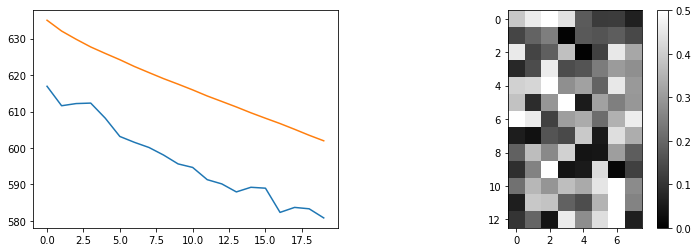

In [158]:
mod = models.Sequential()
mod.add(layers.Dense(8, "relu", input_shape=(train_data.shape[1],)))
mod.add(layers.Dropout(0.5))
mod.add(layers.Dense(8, "relu"))
mod.add(layers.Dropout(0.5))
mod.add(layers.Dense(1))
mod.compile("RMSProp", loss="mse")
res = mod.fit(train_data, train_label, batch_size=128, epochs=20, verbose=0, validation_data=(test_data, test_label))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(res.history["loss"])
plt.plot(res.history["val_loss"])

plt.subplot(1, 2, 2)
plt.imshow(np.abs(mod.layers[0].get_weights()[0]), cmap="gray", vmin=0, vmax=0.5)
plt.colorbar()